In [9]:
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# CREATING 2 PARALLEL TIME-SERIES WITH 1 OUTPUT SERIES

df = pd.read_csv \
    (r"https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv")

# change column names
df.columns = ["date", "X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7", "X_8"]

# dropping all columns and keeping only two
df = df[["X_1", "X_2"]]

# creating output time-series which is mean of other 2 series
df["Y"] = df.apply(lambda row: round((row.X_1 + row.X_2) / 1.9, 1), axis=1)

print(df.head(20))

       X_1     X_2       Y
0   1606.4  1608.3  1691.9
1   1637.0  1622.2  1715.4
2   1629.5  1636.2  1718.8
3   1643.4  1650.3  1733.5
4   1671.6  1664.6  1755.9
5   1666.8  1679.0  1760.9
6   1668.4  1693.5  1769.4
7   1654.1  1708.2  1769.6
8   1671.3  1722.9  1786.4
9   1692.1  1737.8  1805.2
10  1716.3  1752.8  1825.8
11  1754.9  1768.0  1854.2
12  1777.9  1783.3  1874.3
13  1796.4  1798.7  1892.2
14  1813.1  1814.3  1909.2
15  1810.1  1829.9  1915.8
16  1834.6  1845.8  1937.1
17  1860.0  1861.7  1958.8
18  1892.5  1877.8  1984.4
19  1906.1  1894.0  2000.1


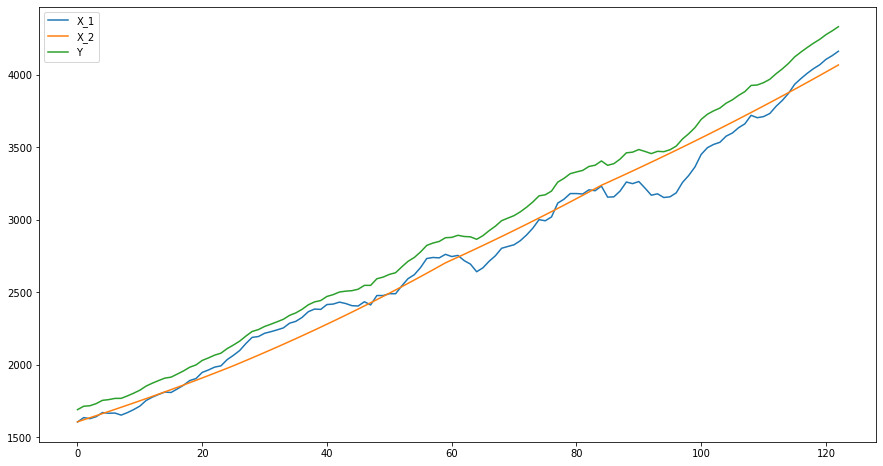

In [6]:

plt.figure(figsize=(15,8))
plt.plot(df["X_1"],label="X_1")
plt.plot(df["X_2"],label="X_2")
plt.plot(df["Y"],label="Y")
plt.legend()
plt.show()

In [7]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


df = df.values
n_steps = 3

# convert into input/output samples
X, y = split_sequences(df, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

print('SHAPE : ', X.shape, y.shape)

[[1606.4 1608.3]
 [1637.  1622.2]
 [1629.5 1636.2]] 1718.8
[[1637.  1622.2]
 [1629.5 1636.2]
 [1643.4 1650.3]] 1733.5
[[1629.5 1636.2]
 [1643.4 1650.3]
 [1671.6 1664.6]] 1755.9
[[1643.4 1650.3]
 [1671.6 1664.6]
 [1666.8 1679. ]] 1760.9
[[1671.6 1664.6]
 [1666.8 1679. ]
 [1668.4 1693.5]] 1769.4
[[1666.8 1679. ]
 [1668.4 1693.5]
 [1654.1 1708.2]] 1769.6
[[1668.4 1693.5]
 [1654.1 1708.2]
 [1671.3 1722.9]] 1786.4
[[1654.1 1708.2]
 [1671.3 1722.9]
 [1692.1 1737.8]] 1805.2
[[1671.3 1722.9]
 [1692.1 1737.8]
 [1716.3 1752.8]] 1825.8
[[1692.1 1737.8]
 [1716.3 1752.8]
 [1754.9 1768. ]] 1854.2
[[1716.3 1752.8]
 [1754.9 1768. ]
 [1777.9 1783.3]] 1874.3
[[1754.9 1768. ]
 [1777.9 1783.3]
 [1796.4 1798.7]] 1892.2
[[1777.9 1783.3]
 [1796.4 1798.7]
 [1813.1 1814.3]] 1909.2
[[1796.4 1798.7]
 [1813.1 1814.3]
 [1810.1 1829.9]] 1915.8
[[1813.1 1814.3]
 [1810.1 1829.9]
 [1834.6 1845.8]] 1937.1
[[1810.1 1829.9]
 [1834.6 1845.8]
 [1860.  1861.7]] 1958.8
[[1834.6 1845.8]
 [1860.  1861.7]
 [1892.5 1877.8]] 1984

In [10]:
# since we have 2 parallel time series
n_features = 2

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10600     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit model
model.fit(X, y, epochs=200)

Epoch 1/200
4/4 [==============================] - 5s 32ms/step - loss: 9311049.0000
Epoch 2/200
4/4 [==============================] - 0s 34ms/step - loss: 8846451.0000
Epoch 3/200
4/4 [==============================] - 0s 29ms/step - loss: 8579909.0000
Epoch 4/200
4/4 [==============================] - 0s 30ms/step - loss: 8290388.5000
Epoch 5/200
4/4 [==============================] - 0s 37ms/step - loss: 8022263.5000
Epoch 6/200
4/4 [==============================] - 0s 27ms/step - loss: 7750437.0000
Epoch 7/200
4/4 [==============================] - 0s 28ms/step - loss: 7495431.5000
Epoch 8/200
4/4 [==============================] - 0s 27ms/step - loss: 7247678.0000
Epoch 9/200
4/4 [==============================] - 0s 31ms/step - loss: 7003566.0000
Epoch 10/200
4/4 [==============================] - 0s 28ms/step - loss: 6764657.0000
Epoch 11/200
4/4 [==============================] - 0s 27ms/step - loss: 6534662.5000
Epoch 12/200
4/4 [==============================] - 0s 31ms/ste

In [12]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
# predicted value must be mean(100,105)
yhat = model.predict(x_input)
print(yhat)

[[111.857346]]
